In [3]:
import numpy as np
import pandas as pd

titanic_df = pd.read_csv("../datasets/titanic-dataset.csv")

In [3]:
titanic = sns.load_dataset('titanic')  # titanic is built-in withing sns, no need to have a hard copy
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


714
714


Text(0.6, 0.95, 'pearsonr = 0.096; p = 0.01')

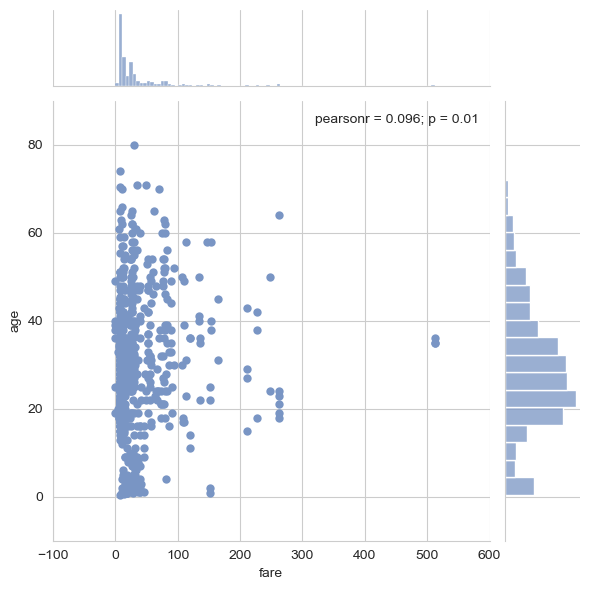

In [93]:
import scipy as sp
titanic2 = titanic.loc[~(titanic.age.isna()),]
titanic2 = titanic2.loc[~(titanic2.fare.isna()),]
x = titanic2['age'].dropna()
y = titanic2['fare'].dropna()
print(len(x))
print(len(y))

r, p = sp.stats.pearsonr(x=titanic2.fare, y=titanic2.age)
sns.jointplot(x="fare",
              y="age",
              data=titanic2, xlim = (-100, 600), ylim = (-10,90), 
              linewidth=0, edgecolor='#000000', color =  "#7995C4")# sns.dark_palette("#69d", reverse=True, as_cmap=True))
plt.text(.6, .95, f"pearsonr = {r:.3f}; p = {p:.2f}", transform=plt.gca().transAxes)


(0.0, 500.0)

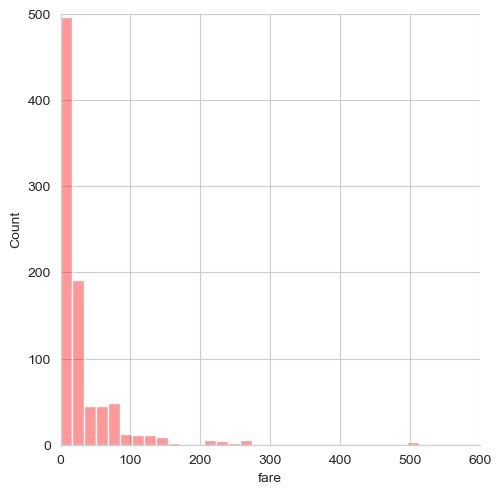

In [17]:
g = sns.displot(titanic['fare'], bins=30, kde=False, color='red', alpha=0.4)
plt.xlim(0, 600)
plt.ylim(0, 500)

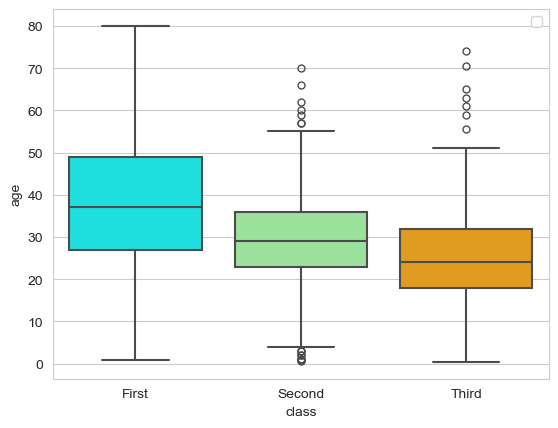

In [11]:
import seaborn as sns 
import matplotlib
palette = {
    'First': 'cyan',
    'Second': 'lightgreen',
    'Third': 'orange'
}
flier_properties = dict(markerfacecolor='none',marker='o')
sns.boxplot(x='class', y='age', data=titanic, hue='class', palette=palette, 
             flierprops=flier_properties, width = 0.8, dodge = False)
legend=[]
plt.legend(legend)

#g._legend.remove()

<Axes: xlabel='class', ylabel='age'>

C:\Users\giselara\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 15.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


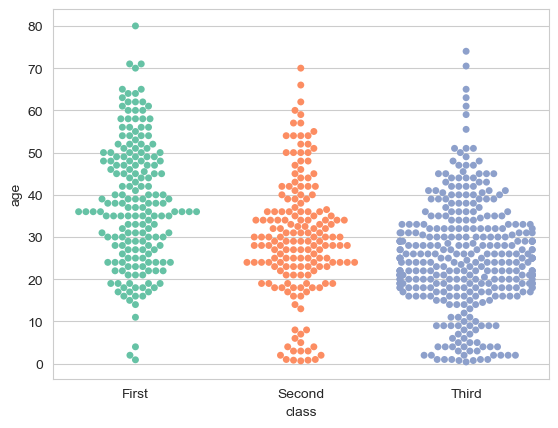

In [45]:
sns.swarmplot(x='class', y='age', data=titanic, hue='class', legend = False, 
              palette = 'Set2')
#              color_palette = "deep")

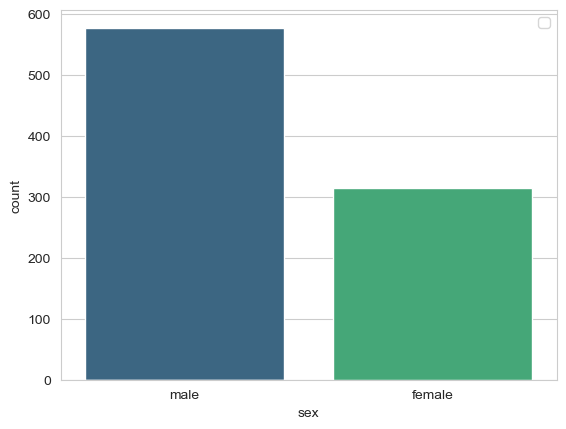

In [65]:
sns.countplot(x='sex', data=titanic, hue='sex', palette = "viridis", dodge = False)
legend=[]
plt.legend(legend)

Text(0.5, 1.0, 'titanic.corr()')

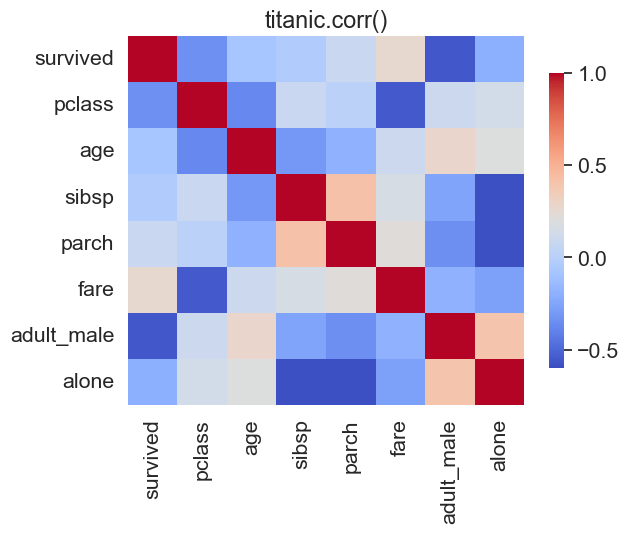

In [215]:
titanic.corr(numeric_only=True)['fare']
continuous_titanic_df = titanic[['age', 'fare']]
corr = titanic.corr(numeric_only = True)

norm = plt.Normalize(-.6,1)
sns.heatmap(titanic.corr(numeric_only=True),cmap='coolwarm',norm = norm,
             vmax=0.8, vmin=-0.6,cbar_kws={"shrink": 0.8})
plt.title('titanic.corr()')


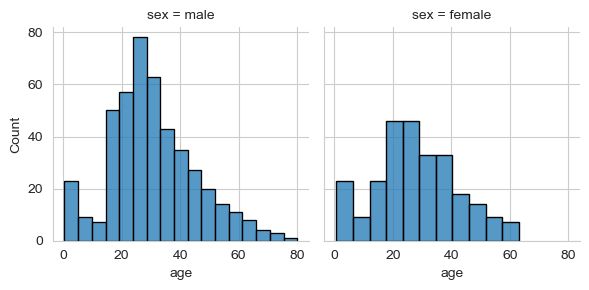

In [101]:
g = sns.FacetGrid(data=titanic, col='sex')
g.map(sns.histplot,'age', edgecolor = 'black')

In [121]:
sns.boxplot?

Signature:
sns.boxplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    order=None,
    hue_order=None,
    orient=None,
    color=None,
    palette=None,
    saturation=0.75,
    width=0.8,
    dodge=True,
    fliersize=5,
    linewidth=None,
    whis=1.5,
    ax=None,
    **kwargs,
)
Docstring:
Draw a box plot to show distributions with respect to categories.

A box plot (or box-and-whisker plot) shows the distribution of quantitative
data in a way that facilitates comparisons between variables or across
levels of a categorical variable. The box shows the quartiles of the
dataset while the whiskers extend to show the rest of the distribution,
except for points that are determined to be "outliers" using a method
that is a function of the inter-quartile range.

.. note::
    This function always treats one of the variables as categorical and
    draws data at ordinal positions (0, 1, ... n) on the relevant axis,
    even when the data has a numeric or date type.

See th